#### Import all required Packages

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Downloaded Weights and Configuration file from YOLO portal for training the data

In [ ]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

#### Pre-processing of data for better object detection in the given image

In [ ]:
image = cv2.imread("./trafficImage.png")
# Split the image into B, G, R channels
b, g, r = cv2.split(image)

# Apply histogram equalization to each channel
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

# Merge the equalized channels back together
image = cv2.merge((equalized_b, equalized_g, equalized_r))
# image = cv2.equalizeHist(image)
# image = cv2.GaussianBlur(image, (5, 5), 0)
height, width, channels = image.shape

#### Image considered for vehicle detection and to determine count of vehicles

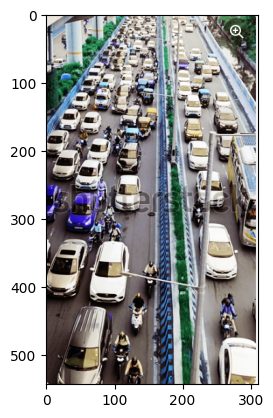

In [ ]:
plt.imshow(image)

#### Creation of a blob from image for passing it as an input to YOLO algorithm

In [ ]:
blob =cv2.dnn.blobFromImage(image, 1/255, (416,416), (0,0,0), swapRB=True, crop=False)
net.setInput(blob)

In [ ]:
outs = net.forward(output_layers)

#### Vehicle Count and Categorization based on confidence values

In [ ]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Confidence threshold
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
vehicle_classes = [2, 3, 5, 7]  # Class IDs for 'car','bike', 'bus', 'truck' in COCO dataset
vehicle_count = sum(1 for class_id in class_ids if class_id in vehicle_classes)

print(f"Total number of vehicles: {vehicle_count}")

Total number of vehicles: 127


In [ ]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

#### Vehicle detection and encapsulating the vehicles with boxes along with the category it belongs to

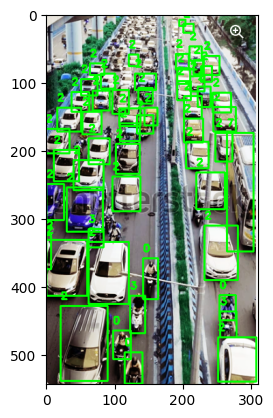

In [ ]:
for i in indices:
    # print(i)
    # if class_ids[i] in vehicle_classes:
        x, y, w, h = boxes[i]
        label = str(class_ids[i])
        color = (0, 255, 0)  # Green color for rectangle
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the image with rectangles
plt.imshow(image)


#### Summary:

<ol>
<li>
The YOLO algorithm is a pre-trained model which is open source with support for more than 1000 different categories of images.
</li>
<li>
The CONFIG and Weights file are downloaded for training the model.
</li>
<li>
The class ID of vehicles are defined and only the objects which belong to those id's are detected, in this case vehicles.
</li>
<li>
The image is passed to the model and is trained to spot/detect the vehicles to count the no. of vehicles at one point in time.
</li>
<li>
The detected objects(vehicles) are surrounded by a box for depiction in the final image along with the actual category of vehicles found at a point in time.
</li>
</ol>

#### Conculsion:
<p>This method helps us find the no. of vehicles and various categories of vehicles found during a point in time for future analysis and preparation for traffic management.</p>
